# WINE QUALITY PREDICTION

## Import Libraries

In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [84]:
df = pd.read_csv(r"C:\Users\kavya\OneDrive\Desktop\data science\winequality-red.csv")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [85]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [86]:
df.shape

(1599, 12)

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [88]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [89]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [90]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

# Exploratory Data Analysis

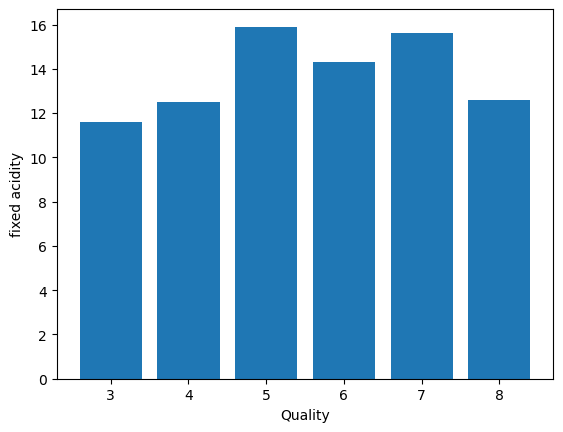

In [91]:
# quality vs fixed acidity
plt.bar(df['quality'],df['fixed acidity'])
plt.xlabel('Quality')
plt.ylabel('fixed acidity')
plt.show()

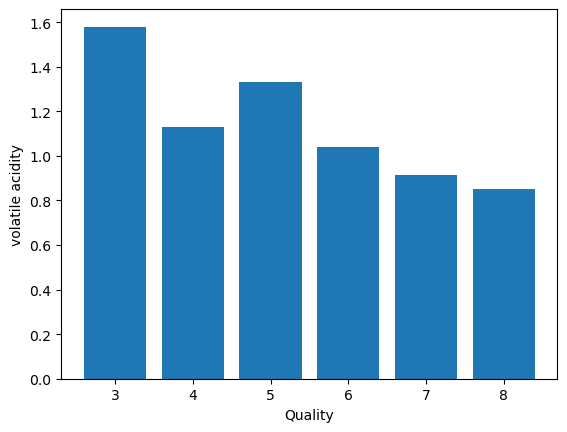

In [92]:
#  volatile acidity vs quality
plt.bar(df['quality'],df['volatile acidity'])
plt.xlabel('Quality')
plt.ylabel('volatile acidity')
plt.show()

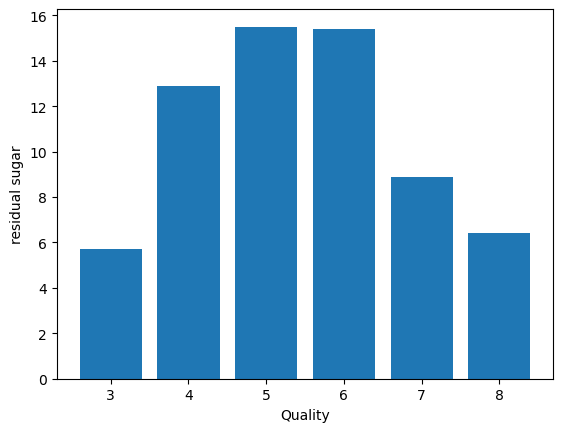

In [93]:
# residual sugar vs quality 
plt.bar(df['quality'],df['residual sugar'])
plt.xlabel('Quality')
plt.ylabel('residual sugar')
plt.show()

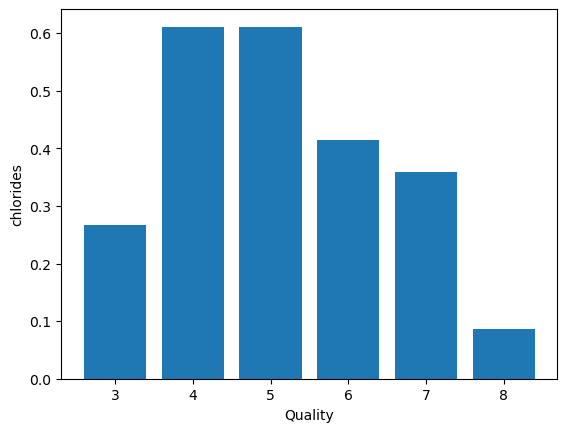

In [94]:
# Chlorides vs quality 
plt.bar(df['quality'],df['chlorides'])
plt.xlabel('Quality')
plt.ylabel('chlorides')
plt.show()

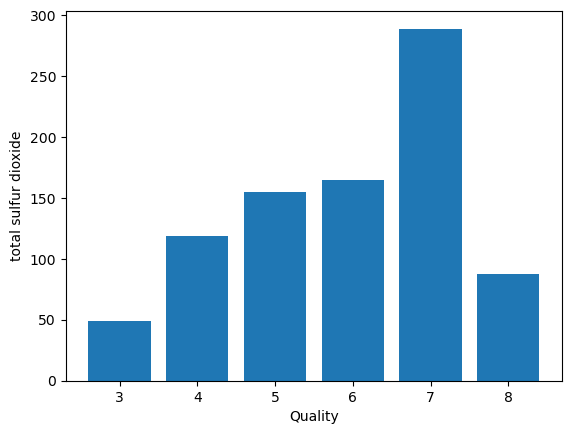

In [95]:
# total sulfur dioxide vs quality 
plt.bar(df['quality'],df['total sulfur dioxide'])
plt.xlabel('Quality')
plt.ylabel('total sulfur dioxide')
plt.show()

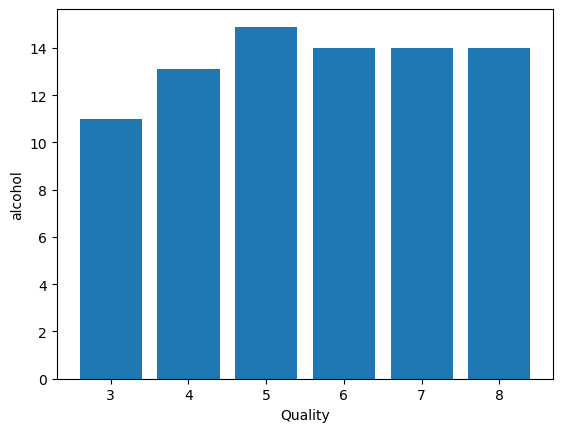

In [96]:
# alcohol vs quality 
plt.bar(df['quality'],df['alcohol'])
plt.xlabel('Quality')
plt.ylabel('alcohol')
plt.show()

### Correlation matrix

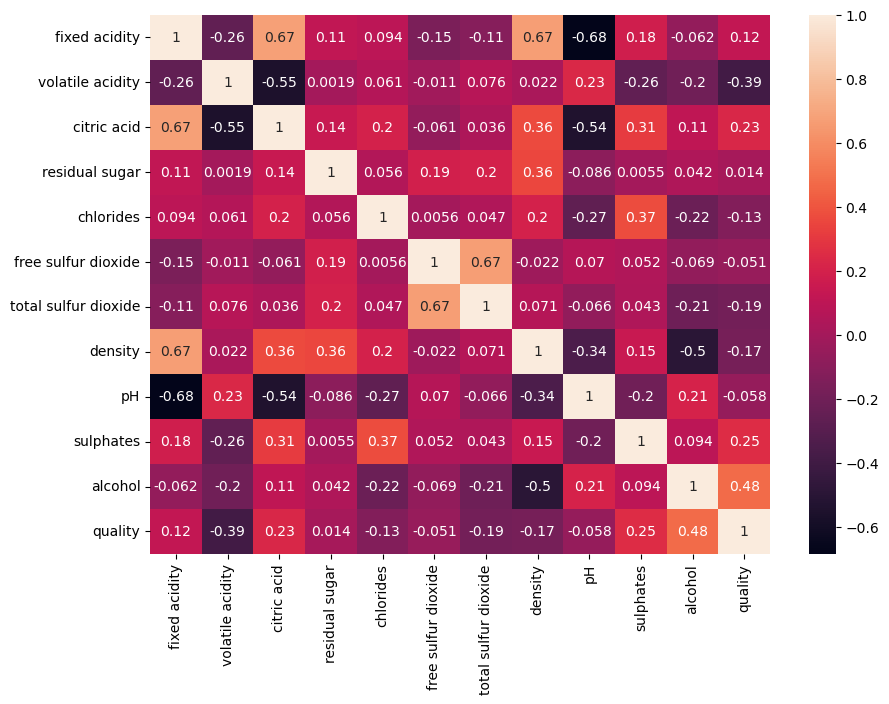

In [97]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), annot=True)
plt.show()

# Binarization of target variable

In [98]:
df['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [99]:
df['quality'] = [1 if x>=7 else 0 for x in df['quality']]

In [100]:
df['quality'].unique()

array([0, 1], dtype=int64)

In [22]:
df['quality'].value_counts()

quality
0    1382
1     217
Name: count, dtype: int64

<Axes: xlabel='quality', ylabel='count'>

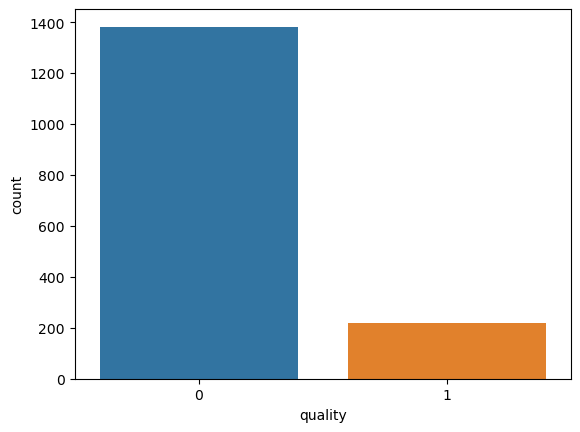

In [23]:
sns.countplot(x = df['quality'])

# Model Training

In [24]:
X = df.drop('quality',axis=1)
y = df['quality']

##  Split the dataset

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)

## Feature Scaling

In [26]:
from sklearn.preprocessing import StandardScaler 

In [27]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [28]:
X_train

array([[ 0.90103398,  0.05480282,  0.9094138 , ...,  0.52091013,
        -0.22358408, -0.95579434],
       [ 1.41998736, -1.47967601,  0.9094138 , ..., -1.16841553,
        -0.68130963, -0.76727388],
       [ 0.90103398, -0.98645067,  1.4208416 , ..., -0.3237527 ,
         0.74908272,  0.17532846],
       ...,
       [-0.25219574,  0.21921126,  0.19341488, ..., -0.12883051,
         0.17692578, -0.86153411],
       [ 2.68854005, -0.32881689,  1.11398492, ..., -0.06385645,
         0.11971008,  2.15479335],
       [ 0.84337249,  2.46612668,  0.24455766, ..., -0.38872677,
        -1.0246038 , -0.95579434]])

# Apply PCA

In [29]:
from sklearn.decomposition import PCA

In [30]:
pca = PCA(n_components=0.90)

In [31]:
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [32]:
sum(pca.explained_variance_ratio_)

0.9068749861160775

In [33]:
pca.explained_variance_ratio_

array([0.28263119, 0.17942214, 0.1358536 , 0.10862763, 0.08692731,
       0.06008452, 0.0533286 ])

# Model Evaluation and Prediction

In [101]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,recall_score,confusion_matrix,precision_score,f1_score,classification_report
from sklearn import metrics
from sklearn.metrics import roc_curve


## 1.Logistic Regression

In [102]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
accuracy_lr = lr.score(X_test,y_test)
print("Logistic Regression accuracy is:",accuracy_lr)


Logistic Regression accuracy is: 0.903125


In [103]:
lr_predict = lr.predict(X_test)
cls_report = classification_report(y_test,lr_predict)
print(cls_report)

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       290
           1       0.48      0.40      0.44        30

    accuracy                           0.90       320
   macro avg       0.71      0.68      0.69       320
weighted avg       0.90      0.90      0.90       320



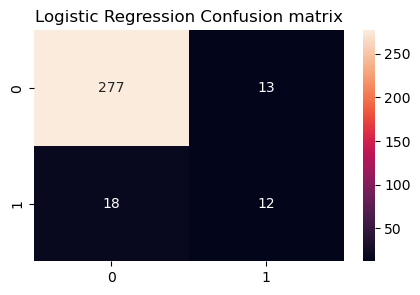

In [104]:
plt.figure(figsize=(5,3))
sns.heatmap(confusion_matrix(y_test,lr_predict),annot=True,fmt="d")
plt.title("Logistic Regression Confusion matrix",fontsize=12)
plt.show()

# 2.KNN 

In [105]:
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(X_train, y_train)
knn_predict = knn.predict(X_test)
accuracy_knn = knn.score(X_test,y_test)
print("K Nearest Neighbors classifier accuracy is:",accuracy_knn)

K Nearest Neighbors classifier accuracy is: 0.909375


In [106]:
cls_report = classification_report(y_test,knn_predict)
print(cls_report)

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       290
           1       0.52      0.40      0.45        30

    accuracy                           0.91       320
   macro avg       0.73      0.68      0.70       320
weighted avg       0.90      0.91      0.90       320



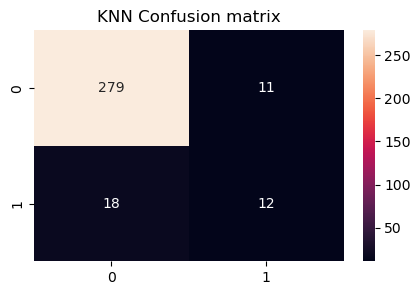

In [107]:
plt.figure(figsize=(5,3))
sns.heatmap(confusion_matrix(y_test,knn_predict),annot=True,fmt="d")
plt.title("KNN Confusion matrix",fontsize=12)
plt.show()

# 3.SVC

In [126]:
svc_model = SVC(random_state=1)
svc_model.fit(X_train,y_train)
sv_predict = svc_model.predict(X_test)
accuracy_svc = svc_model.score(X_test,y_test)
print("SVM accuracy is:",accuracy_svc)

SVM accuracy is: 0.921875


In [127]:
cls_report = classification_report(y_test,sv_predict)
print(cls_report)

              precision    recall  f1-score   support

           0       0.93      0.99      0.96       290
           1       0.78      0.23      0.36        30

    accuracy                           0.92       320
   macro avg       0.85      0.61      0.66       320
weighted avg       0.91      0.92      0.90       320



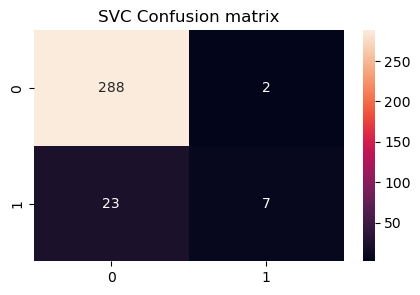

In [128]:
plt.figure(figsize=(5,3))
sns.heatmap(confusion_matrix(y_test,y_predict),annot=True,fmt="d")
plt.title("SVC Confusion matrix",fontsize=12)
plt.show()

# 4.Random Forest Classifier

In [111]:
rf_model = RandomForestClassifier(n_estimators=300)
rf_model.fit(X_train,y_train)
y_pred1=rf_model.predict(X_test)
accuracy_rf = rf_model.score(X_test,y_test)
print("Random Forest accuracy is:",accuracy_rf)

Random Forest accuracy is: 0.94375


In [112]:
cls_report = classification_report(y_test,y_pred1)
print(cls_report)

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       290
           1       0.93      0.43      0.59        30

    accuracy                           0.94       320
   macro avg       0.94      0.71      0.78       320
weighted avg       0.94      0.94      0.93       320



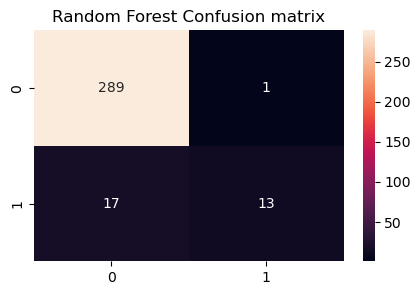

In [113]:
plt.figure(figsize=(5,3))
sns.heatmap(confusion_matrix(y_test,y_pred1),annot=True,fmt="d")
plt.title("Random Forest Confusion matrix",fontsize=12)
plt.show()

# 5.Decision Tree

In [114]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train,y_train)
y_pred2=dt_model.predict(X_test)
accuracy_dt = dt_model.score(X_test,y_test)
print("Decision Tree accuracy is:",accuracy_dt)

Decision Tree accuracy is: 0.90625


In [115]:
cls_report = classification_report(y_test,y_pred2)
print(cls_report)

              precision    recall  f1-score   support

           0       0.95      0.94      0.95       290
           1       0.50      0.57      0.53        30

    accuracy                           0.91       320
   macro avg       0.73      0.75      0.74       320
weighted avg       0.91      0.91      0.91       320



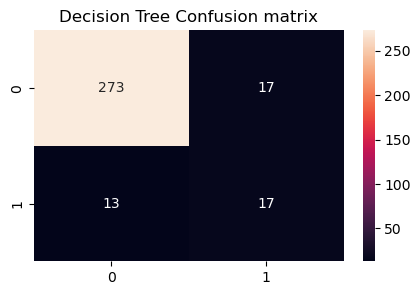

In [116]:
plt.figure(figsize=(5,3))
sns.heatmap(confusion_matrix(y_test,y_pred2),annot=True,fmt="d")
plt.title("Decision Tree Confusion matrix",fontsize=12)
plt.show()

# 6. GradientBoostingClassifier

In [117]:
gbc_model = GradientBoostingClassifier()
gbc_model.fit(X_train,y_train)
y_pred3=dt_model.predict(X_test)
accuracy_gbc = gbc_model.score(X_test,y_test)
print("Gradient Boosting accuracy is:",accuracy_gbc)

Gradient Boosting accuracy is: 0.940625


In [118]:
cls_report = classification_report(y_test,y_pred3)
print(cls_report)

              precision    recall  f1-score   support

           0       0.95      0.94      0.95       290
           1       0.50      0.57      0.53        30

    accuracy                           0.91       320
   macro avg       0.73      0.75      0.74       320
weighted avg       0.91      0.91      0.91       320



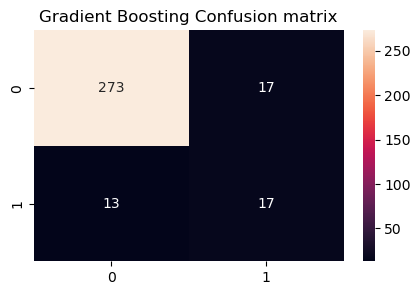

In [119]:
plt.figure(figsize=(5,3))
sns.heatmap(confusion_matrix(y_test,y_pred3),annot=True,fmt="d")
plt.title("Gradient Boosting Confusion matrix",fontsize=12)
plt.show()

In [121]:
classifiers = {
    'RandomForest': RandomForestClassifier(),
    'Support Vector Machine': SVC(),
    'KNN': KNeighborsClassifier(),
    'LogisticRegression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'GradientBoosting':GradientBoostingClassifier()
}
results = pd.DataFrame(columns=['Accuracy','Bias','variance'])

for method,cls in classifiers.items():
    #train the classifier
    cls.fit(X_train,y_train)
    #Predicting the test set results
    y_pred = cls.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    
    bias = cls.score(X_train,y_train)
    
    variance = cls.score(X_test, y_test)
    
    results.loc[method]=[acc,bias,variance]
    
    #Making the Confusion matrix
    from sklearn.metrics import confusion_matrix
    cm= confusion_matrix(y_test,y_pred)

In [122]:
cm

array([[287,   3],
       [ 16,  14]], dtype=int64)

In [124]:
results

,Accuracy,Bias,variance
RandomForest,0.950000,1.000000,0.950000
Support Vector Machine,0.921875,0.886630,0.921875
KNN,0.903125,0.901486,0.903125
LogisticRegression,0.903125,0.870993,0.903125
Decision Tree,0.909375,1.000000,0.909375
GradientBoosting,0.940625,0.953870,0.940625


# Model Comparison

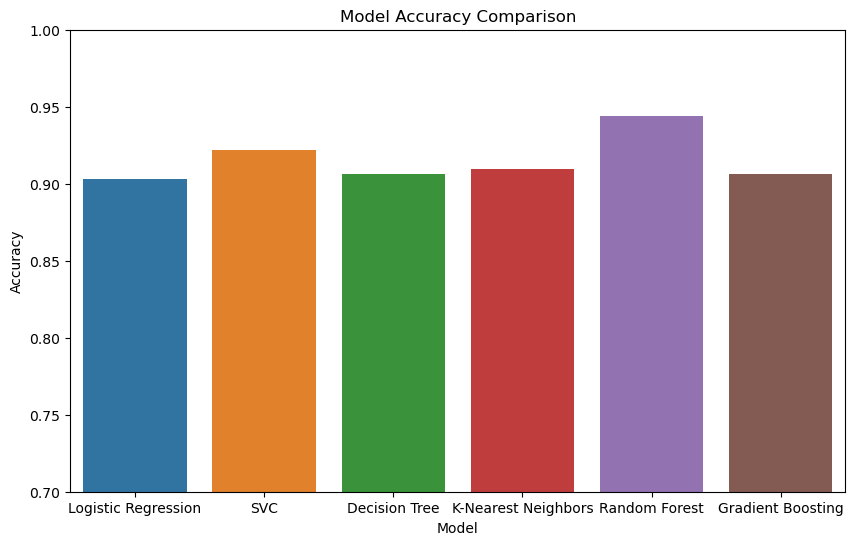

In [132]:
models = ['Logistic Regression', 'SVC', 'Decision Tree', 'K-Nearest Neighbors','Random Forest','Gradient Boosting']
accuracy = [accuracy_score(y_test, lr_predict), accuracy_score(y_test, sv_predict), accuracy_score(y_test, y_pred2), accuracy_score(y_test, knn_predict),accuracy_score(y_test,y_pred1),accuracy_score(y_test,y_pred3)]
plt.figure(figsize=(10,6))
sns.barplot(x=models, y=accuracy)
plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0.7, 1.0)
plt.show()

# Conclusion

In the above models, **Random Forest Classifier** is the good fit model.
It has High accuracy,